In [1]:
import pandas as pd
import numpy as np

In [88]:
txt='''dc-end
HN-start
start-kj
dc-start
dc-HN
LN-dc
HN-end
kj-sa
kj-HN
kj-dc'''

In [93]:
txt='''ey-dv
AL-ms
ey-lx
zw-YT
hm-zw
start-YT
start-ms
dv-YT
hm-ms
end-ey
AL-ey
end-hm
rh-hm
dv-ms
AL-dv
ey-SP
hm-lx
dv-start
end-lx
zw-AL
hm-AL
lx-zw
ey-zw
zw-dv
YT-ms'''

In [94]:
links=[x.split('-') for x in txt.split('\n')]
simetric=[[x[1],x[0]] for x in links]+links
nodes=list(np.unique([x[0] for x in links]+[x[1] for x in links]))
big=[x for x in nodes if x.upper()==x]
small=[x for x in nodes if x.lower()==x]

In [95]:
simetric

[['dv', 'ey'],
 ['ms', 'AL'],
 ['lx', 'ey'],
 ['YT', 'zw'],
 ['zw', 'hm'],
 ['YT', 'start'],
 ['ms', 'start'],
 ['YT', 'dv'],
 ['ms', 'hm'],
 ['ey', 'end'],
 ['ey', 'AL'],
 ['hm', 'end'],
 ['hm', 'rh'],
 ['ms', 'dv'],
 ['dv', 'AL'],
 ['SP', 'ey'],
 ['lx', 'hm'],
 ['start', 'dv'],
 ['lx', 'end'],
 ['AL', 'zw'],
 ['AL', 'hm'],
 ['zw', 'lx'],
 ['zw', 'ey'],
 ['dv', 'zw'],
 ['ms', 'YT'],
 ['ey', 'dv'],
 ['AL', 'ms'],
 ['ey', 'lx'],
 ['zw', 'YT'],
 ['hm', 'zw'],
 ['start', 'YT'],
 ['start', 'ms'],
 ['dv', 'YT'],
 ['hm', 'ms'],
 ['end', 'ey'],
 ['AL', 'ey'],
 ['end', 'hm'],
 ['rh', 'hm'],
 ['dv', 'ms'],
 ['AL', 'dv'],
 ['ey', 'SP'],
 ['hm', 'lx'],
 ['dv', 'start'],
 ['end', 'lx'],
 ['zw', 'AL'],
 ['hm', 'AL'],
 ['lx', 'zw'],
 ['ey', 'zw'],
 ['zw', 'dv'],
 ['YT', 'ms']]

In [48]:
def expandir_cami(cami,simetric):

    bigs_recorreguts=[x for x in cami if x.lower()==x]
    fills=[x[1] for x in simetric if x[0]==cami[-1] and not x[1] in bigs_recorreguts]
    camins=[cami.copy()+[x] for x in fills]
    
    return camins
def expandir_camins(camins,simetric):
    camins_out=[]
    for cami in camins:
        if cami[-1]=='end':
            camins_out+=[cami]
        else:
            camins_out+=expandir_cami(cami,simetric)
    return camins_out

In [49]:
camins=[['start']]
anterior=1
continuar=True
while continuar:
    camins=expandir_camins(camins,simetric)
    actual=len(camins)
    if actual==anterior:
        continuar=False
    anterior=actual
print((actual))

3779


In [57]:
starts=[sum([1 for x in y if x=='start']) for y in camins]
ends=[sum([1 for x in y if x=='end']) for y in camins]
ends=[sum([1 for x in y if x=='end']) for y in camins]

In [64]:
cami=camins[100]
small_reps=[pd.value_counts([x for x in y if x.lower()==x and x not in ['start','end']]).max() for y in camins]

In [96]:
def expandir_cami2(cami,simetric):
    
    minusculas_count=pd.value_counts([x for x in cami if x.lower()==x and x not in ['start','end']])
    if minusculas_count.max()>1:
        
        bigs_recorreguts=[x for x in cami if x.lower()==x]
        fills=[x[1] for x in simetric if x[0]==cami[-1] and not x[1] in bigs_recorreguts and x[1]!='start']
        
    else:
        fills=[x[1] for x in simetric if x[0]==cami[-1] and x[1]!='start']
      
    camins=[cami.copy()+[x] for x in fills]
    
    return camins
def expandir_camins2(camins,simetric):
    camins_out=[]
    for cami in camins:
        if cami[-1]=='end':
            camins_out+=[cami]
        else:
            camins_out+=expandir_cami2(cami,simetric)
    return camins_out

In [98]:
camins=[['start']]
anterior=1
continuar=True
while continuar:
    camins=expandir_camins2(camins,simetric)
    actual=len(camins)
    if actual==anterior:
        continuar=False
    anterior=actual
    print(actual)
print((actual))

3
12
58
266
1102
4097
13073
34489
73023
120945
153045
146925
115836
96988
96988
96988


In [99]:
# 12


In [1]:
txt='''6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0'''

In [23]:
txt='''77,882
656,319
787,478
0,487
1158,150
462,543
1073,509
989,886
1014,225
38,105
865,52
510,395
979,602
959,554
72,29
10,493
318,722
637,189
1231,406
152,821
1124,728
820,207
328,323
430,381
668,21
618,884
691,879
345,427
162,687
739,394
577,847
965,427
495,245
52,352
366,260
35,849
1285,89
402,677
254,141
987,327
808,270
619,401
1203,233
1096,198
1086,466
452,283
243,122
1051,299
692,458
102,285
815,649
930,660
319,777
472,506
291,431
656,166
527,316
1145,138
164,655
646,473
1293,203
142,21
1208,18
1039,885
502,753
694,109
776,262
132,88
1283,638
1014,669
912,403
1145,756
1069,672
421,243
1227,430
855,92
870,198
7,726
1017,14
738,459
979,327
1118,239
562,865
137,730
83,430
743,331
636,448
1148,547
254,753
960,462
102,130
1029,549
73,58
821,756
1288,812
199,828
413,40
82,435
308,395
107,233
440,368
569,670
1109,206
719,875
494,54
333,8
1004,348
800,164
411,724
77,210
900,165
80,340
649,522
85,33
1058,677
291,543
594,18
758,738
512,546
1279,854
124,312
619,15
247,138
624,465
1102,156
165,138
42,694
470,39
984,123
1153,43
132,478
961,5
932,264
850,358
763,698
490,655
191,414
959,106
336,647
656,347
1104,441
1067,859
36,436
733,847
370,428
97,712
584,276
252,441
411,170
131,430
1076,494
271,9
201,206
1178,478
572,459
3,567
803,694
1186,507
442,84
571,532
1069,525
194,806
818,871
1230,340
770,534
304,840
381,219
1171,513
338,361
351,340
336,23
1039,512
975,616
272,782
796,716
160,287
1223,10
201,458
815,245
678,432
825,3
420,597
773,400
572,817
1231,210
624,88
940,68
1208,609
855,316
840,605
1308,70
738,817
1158,821
577,460
497,182
629,421
333,522
131,464
1178,806
325,500
677,329
666,52
1218,400
678,502
1283,190
1014,241
1173,476
741,236
512,796
1272,120
1064,788
433,480
865,730
187,177
185,378
30,88
7,441
743,322
303,289
959,65
162,347
577,47
1131,822
1069,623
22,604
1111,380
370,792
636,619
1081,848
644,52
373,702
994,361
992,396
1265,736
897,301
929,675
383,830
234,404
35,718
349,889
291,463
1293,189
1047,413
35,243
358,673
1178,416
185,516
562,404
77,854
513,826
1300,493
616,102
351,554
494,392
698,68
1280,241
858,312
537,400
1223,93
748,628
940,826
77,434
489,618
546,560
497,712
176,145
239,577
927,134
798,796
127,474
430,605
23,849
813,712
960,716
753,253
1218,381
161,84
800,282
452,312
562,490
70,276
1289,329
673,33
1268,550
1280,528
184,21
480,567
167,873
488,432
137,612
637,637
358,653
961,602
848,705
154,386
718,725
1108,333
1064,211
880,381
741,670
291,203
416,880
45,736
1109,688
229,29
986,166
160,840
246,106
713,190
651,516
1131,520
348,404
825,739
1205,737
397,19
1223,796
510,613
1292,843
811,616
326,508
398,715
731,801
97,46
334,236
199,66
114,810
1226,492
1115,520
12,873
1111,540
683,704
549,737
1170,390
959,452
899,724
986,280
686,241
406,450
499,54
1253,190
818,23
470,289
1016,870
597,190
1186,835
160,502
1275,849
959,177
1061,637
895,658
348,490
780,731
139,605
1260,1
679,106
1058,350
902,211
1289,565
579,93
296,806
514,147
266,290
256,381
1170,626
841,528
184,263
947,203
562,46
632,290
736,106
184,873
813,3
288,430
224,802
1076,490
1150,502
800,612
219,213
252,350
185,304
448,632
708,352
880,130
868,810
239,317
1228,613
562,513
713,638
550,700
976,658
346,171
420,774
647,117
523,128
53,784
678,530
534,120
378,159
1193,58
577,40
664,473
530,835
562,494
656,534
1203,661
25,25
281,549
291,691
1158,243
1056,141
830,701
823,469
713,704
910,801
157,851
631,676
1173,85
472,730
1014,806
502,598
296,877
754,63
291,351
1091,233
977,451
383,642
1071,236
818,471
862,693
1186,59
1274,436
940,428
1307,775
862,632
604,750
139,513
1307,516
1059,353
1203,698
276,264
517,866
821,187
166,290
523,794
1256,110
587,747
739,464
182,501
562,266
840,42
1275,243
604,1
816,287
713,256
932,630
1002,395
567,331
239,236
989,74
1233,460
55,64
664,535
1086,381
331,602
273,110
899,170
686,689
1305,451
1086,285
932,735
114,362
698,694
1158,40
1218,439
331,327
698,200
1215,859
739,532
654,534
1158,624
1196,810
1200,128
808,73
513,131
241,525
408,659
162,547
92,886
556,63
259,299
666,742
592,169
7,117
440,78
137,282
616,785
109,219
70,403
320,236
412,103
830,822
899,618
30,653
1280,770
1144,40
1310,280
1041,862
947,15
989,8
1091,213
349,292
1086,428
862,245
154,508
346,723
234,754
413,271
462,207
328,386
681,869
186,280
753,176
731,93
808,262
445,556
494,840
557,718
1198,78
80,820
140,147
415,658
1171,269
1076,588
105,737
616,445
855,578
1005,154
542,646
1128,393
517,164
912,491
1067,35
242,791
209,756
947,463
547,698
411,324
644,376
912,715
810,60
880,428
956,493
112,78
947,400
398,65
1115,254
523,640
567,563
1255,830
1170,147
1288,432
851,702
925,414
160,54
547,661
1109,212
335,616
488,40
793,364
580,124
189,84
1058,322
716,18
80,422
102,156
107,698
1108,878
433,605
164,239
890,120
398,403
664,807
546,782
748,266
485,331
415,236
653,730
1124,280
0,575
1121,362
124,59
545,667
674,448
1141,155
899,84
331,154
515,513
1071,577
82,116
1101,108
1225,861
813,451
637,33
1125,378
1166,169
1038,782
97,624
249,189
1250,18
1223,523
499,278
1272,445
31,854
787,416
897,593
97,396
487,425
691,849
858,449
430,285
1101,351
189,28
1285,25
981,75
855,802
321,8
574,340
947,431
753,718
411,618
224,285
334,658
331,740
35,270
929,558
497,184
159,103
249,12
497,891
108,334
378,264
880,876
296,669
1304,236
830,72
31,488
167,425
75,801
1258,352
3,775
912,65
363,543
44,828
1007,666
1091,661
84,402
855,540
1305,73
743,563
179,520
1073,833
1026,792
85,147
656,280
271,512
889,243
358,241
632,392
1275,270
1063,138
87,371
880,285
880,289
1111,578
1125,516
1037,219
445,52
1168,873
462,705
1223,563
195,254
169,155
117,58
53,558
54,560
982,508
967,541
1205,157
858,344
619,879
848,257
514,716
1047,481
1014,877
114,84
157,43
1059,801
899,324
686,1
445,584
25,537
904,2
649,373
284,792
452,102
1250,466
388,92
1233,210
1001,427
28,413
201,240
385,414
803,200
571,500
517,197
378,735
370,68
733,47
646,535
60,466
1288,604
8,535
38,102
1148,743
306,289
1136,712
822,432
679,788
748,513
764,560
1230,442
85,658
1058,453
27,638
698,708
485,3
1019,351
899,810
681,421
1213,396
813,67
624,429
950,362
991,777
1064,198
363,203
366,109
1044,738
80,452
328,235
686,429
647,168
842,840
405,294
1136,633
1126,21
656,278
624,893
691,401
350,462
345,705
480,822
408,235
1068,791
1143,425
114,756
1193,584
134,593
709,784
686,256
348,714
273,675
1,164
600,782
1213,46
350,716
1196,756
1183,474
1069,719
1002,638
571,394
349,602
736,459
494,432
497,3
1293,33
269,862
202,16
694,449
294,810
764,112
493,707
199,540
619,45
1186,312
1126,605
678,604
1193,836
241,672
1019,203
28,481
597,638
1067,122
612,344
201,212
400,801
237,833
306,348
425,865
152,632
381,675
239,3
574,659
870,368
20,457
1067,618
552,156
686,893
890,196
502,29
787,794
82,281
599,700
1041,249
351,177
303,228
1225,672
502,821
391,481
400,93
430,18
448,262
1019,463
780,59
644,742
793,164
492,471
87,115
547,644
574,554
694,893
25,89
1121,866
490,239
1256,560
739,362
405,257
430,876
730,124
370,102
366,634
95,411
523,766
452,113
1236,772
544,10
162,151
489,187
663,329
763,196
195,702
527,578
766,10
979,119
930,234
780,582'''

In [3]:
punts

[[6, 10],
 [0, 14],
 [9, 10],
 [0, 3],
 [10, 4],
 [4, 11],
 [6, 0],
 [6, 12],
 [4, 1],
 [0, 13],
 [10, 12],
 [3, 4],
 [3, 0],
 [8, 4],
 [1, 10],
 [2, 14],
 [8, 10],
 [9, 0]]

In [6]:
def doblar_y(points,y):
    out_points=[]
    for point in points:
        if point[1]<=y:
            out_points.append(point)
        else:
            new_point=point.copy()
            new_point[1]=y-(new_point[1]-y)
            out_points.append(new_point)
    return out_points
def doblar_x(points,x):
    out_points=[]
    for point in points:
        if point[0]<=x:
            out_points.append(point)
        else:
            new_point=point.copy()
            new_point[0]=x-(new_point[0]-x)
            out_points.append(new_point)
    return out_points


In [24]:
punts=[[int (y) for y in x.split(',')] for x in txt.split('\n')]

In [10]:
punts=doblar_y(punts,7)
punts=doblar_x(punts,5)


In [14]:
import numpy as np

In [37]:
def plot_punts(punts):
    x=[x[0] for x in punts]
    y=[x[1] for x in punts]
    matriu=np.zeros((max(x)+1,max(y)+1))
    for p in zip(y,x):
        matriu[p[1],p[0]]=1
    return matriu

In [22]:
plot_punts(punts)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
folds='''fold along x=655
fold along y=447
fold along x=327
fold along y=223
fold along x=163
fold along y=111
fold along x=81
fold along y=55
fold along x=40
fold along y=27
fold along y=13
fold along y=6'''

In [25]:
punts=doblar_x(punts,655)

In [29]:
punts=doblar_y(punts,447)
punts=doblar_x(punts,327)
punts=doblar_y(punts,223)
punts=doblar_x(punts,163)
punts=doblar_y(punts,111)
punts=doblar_x(punts,81)
punts=doblar_y(punts,55)
punts=doblar_x(punts,40)
punts=doblar_y(punts,27)
punts=doblar_y(punts,13)
punts=doblar_y(punts,6)











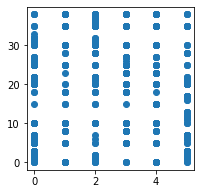

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.plot([x[1] for x in punts],[x[0] for x in punts],'o')
plt.show()

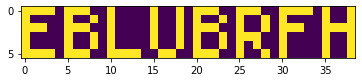

In [39]:
plt.imshow(plot_punts(punts).T)

In [ ]:
EBLUBRFH